# Machine Learning for Time Series Data in Python - Part 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from functools import partial 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## Predicting Time Series Data

### Introducing the dataset
As mentioned in the video, you'll deal with stock market prices that fluctuate over time. In this exercise you've got historical prices from two tech companies (Ebay and Yahoo) in the DataFrame prices. You'll visualize the raw data for the two companies, then generate a scatter plot showing how the values for each company compare with one another. Finally, you'll add in a "time" dimension to your scatter plot so you can see how this relationship changes over time.

The data has been loaded into a DataFrame called prices.

In [2]:
prices = pd.read_csv('../datasets/stock/prices-split-adjusted.csv', index_col='date', parse_dates=['date'])
prices.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
prices = pd.pivot_table(prices, 'close', prices.index, 'symbol')
prices.head()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.77,40.380001,30.572857,NaN,26.629999,26.129884,42.070000,37.090000,31.670000,...,25.379999,69.150002,35.330002,8.63,NaN,17.100000,25.226457,60.020000,13.33,NaN
2010-01-05,22.145923,5.31,40.139999,30.625713,NaN,26.440001,25.918773,42.330002,37.700001,31.620001,...,25.059999,69.419998,34.910000,8.64,NaN,17.230000,25.140187,61.919998,13.80,NaN
2010-01-06,22.067240,5.09,40.490002,30.138571,NaN,26.190001,26.062713,42.779999,37.619999,31.559999,...,24.889999,70.019997,35.139999,8.56,NaN,17.170000,24.960462,61.900002,15.00,NaN
2010-01-07,22.038626,5.24,40.480000,30.082857,NaN,25.770000,26.278623,42.740002,36.889999,31.309999,...,24.639999,69.800003,35.599998,8.60,NaN,16.700001,24.953272,63.320000,16.68,NaN
2010-01-08,22.031474,5.14,40.639999,30.282858,NaN,26.049999,26.412967,42.570000,36.689999,31.490000,...,25.000000,69.519997,35.599998,8.57,NaN,16.700001,24.960462,61.990002,16.41,NaN


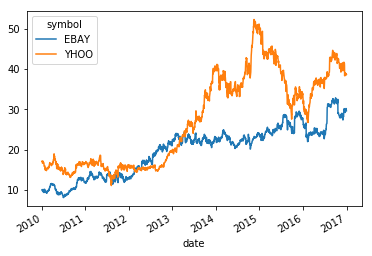

In [4]:
# Plot the raw values over time
prices[['EBAY', 'YHOO']].plot()
plt.show()

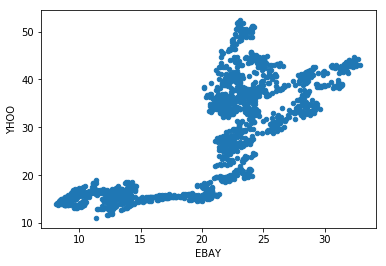

In [5]:
# Scatterplot with one company per axis
prices.plot.scatter('EBAY', 'YHOO')
plt.show()

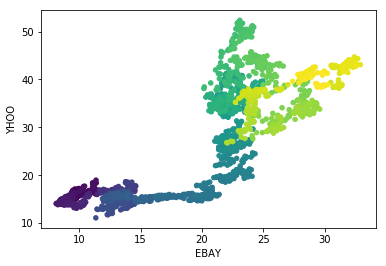

In [6]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, cmap=plt.cm.viridis, colorbar=False)
plt.show()

### Fitting a simple regression model
Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the prices DataFrame. Below is a mapping from company name to column name:
```
ebay: 'EBAY'
nvidia: 'NVDA'
yahoo: 'YHOO'
apple: 'AAPL'
```
We'll use these columns to define the input/output arrays in our model.

In [7]:
# Use stock symbols to extract training data
X = prices[['EBAY', 'NVDA', 'YHOO']].values
y = prices[['AAPL']].values

In [8]:
# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-0.57572328 -3.77870951 -5.46034809]


### Visualizing predicted values
When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables X and y) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

In [9]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False, random_state=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-43.4781227731


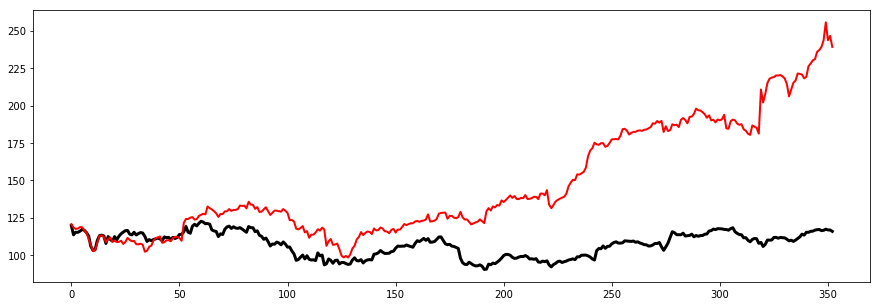

In [11]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

### Visualizing messy data
Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

The data has been loaded into a DataFrame called prices.

In [12]:
messy_prices = prices[['EBAY', 'NVDA', 'YHOO']].copy()
messy_prices.loc['2014'] = np.nan

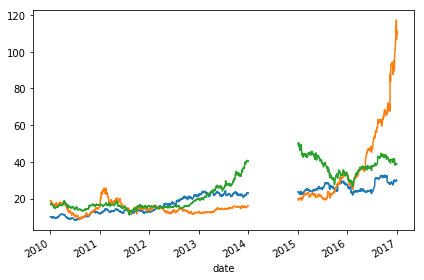

In [13]:
# Visualize the dataset
messy_prices.plot(legend=False)
plt.tight_layout()
plt.show()

In [14]:
# Count the missing values of each time series
missing_values = messy_prices.isna().sum()
print(missing_values)

symbol
EBAY    252
NVDA    252
YHOO    252
dtype: int64


### Imputing missing values
When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (interpolate_and_plot()) you'll use to interpolate missing data points and plot them.

A single time series has been loaded into a DataFrame called prices.

In [15]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

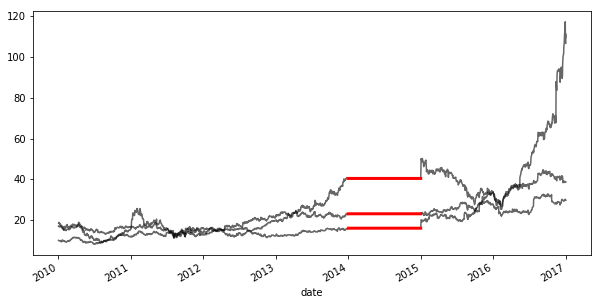

In [16]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(messy_prices, interpolation_type)

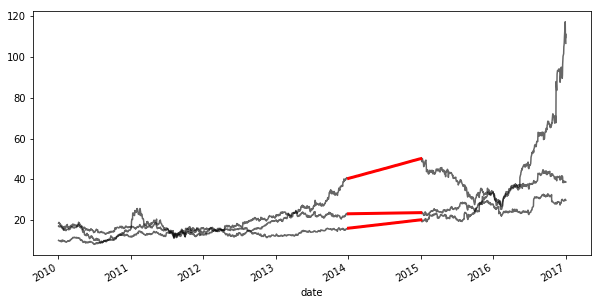

In [17]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(messy_prices, interpolation_type)

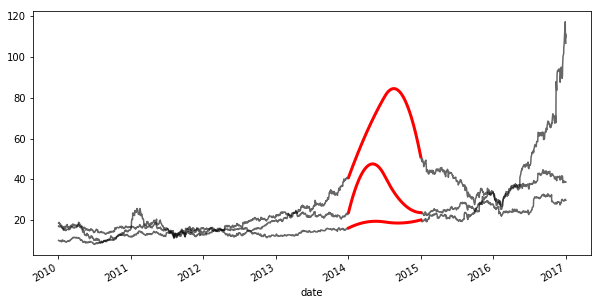

In [18]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(messy_prices, interpolation_type)

### Transforming raw data
In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

In [19]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

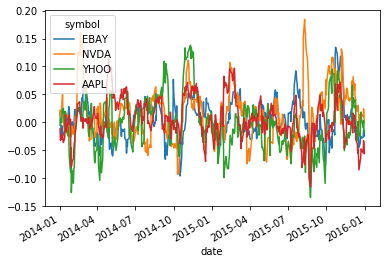

In [20]:
# Apply your custom function and plot
prices_perc = prices[['EBAY', 'NVDA', 'YHOO', 'AAPL']].rolling(20).aggregate(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

### Handling outliers
In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

In [21]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

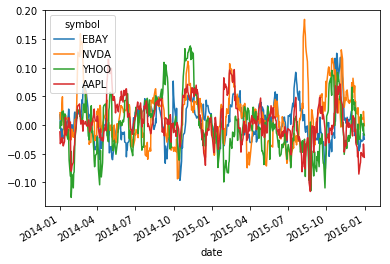

In [22]:
# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.aggregate(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

### Engineering multiple rolling features at once
Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.

In [23]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc[['EBAY']].rolling(20, min_periods=5, closed='right')

In [24]:
# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

In [25]:
# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

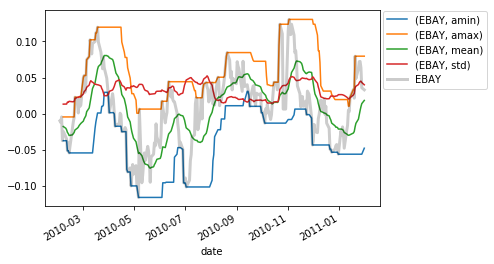

In [26]:
# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc[['EBAY']].loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

### Percentiles and partial functions
In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same percentile() function in numpy.

In [38]:
percentiles = [1, 10, 25, 50, 75, 90, 99]

In [39]:
# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

In [40]:
# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


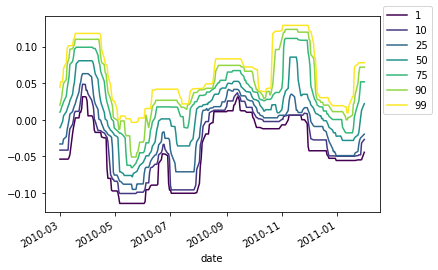

In [43]:
# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

### Using "date" information
It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In this exercise, you'll extract these date/time based features. A single time series has been loaded in a variable called prices.

In [44]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

In [45]:
# Print prices_perc
print(prices_perc)

symbol          EBAY      NVDA      YHOO      AAPL  day_of_week  week_of_year  \
date                                                                            
2010-01-04       NaN       NaN       NaN       NaN            0             1   
2010-01-05       NaN       NaN       NaN       NaN            1             1   
2010-01-06       NaN       NaN       NaN       NaN            2             1   
2010-01-07       NaN       NaN       NaN       NaN            3             1   
2010-01-08       NaN       NaN       NaN       NaN            4             1   
2010-01-11       NaN       NaN       NaN       NaN            0             2   
2010-01-12       NaN       NaN       NaN       NaN            1             2   
2010-01-13       NaN       NaN       NaN       NaN            2             2   
2010-01-14       NaN       NaN       NaN       NaN            3             2   
2010-01-15       NaN       NaN       NaN       NaN            4             2   
2010-01-19       NaN       N